### Pathline tracing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ttim as tt

Pathlines are computed through numerical integration of the velocity vector. Pathlines are computed with the `timtrace` function. The `timtrace` function takes as input arguments the starting locations of the pathline (`xstart`, `ystart`, `zstart`), a list with the starting time and end time of the pathline (`tstartend`), a time offset (`tstartoffset`), and a maximum time step (`tstep`). The pathline starts at the starting time plus the time offset (`tstartoffset`). When the starting time is at the time of a change in boundary condition (e.g., a well starts pumping), the time offset can not be smaller than `tmin`. The `timtrace` function has several keyword arguments to affect the numerical integration procedure. The `hstepmax` keyword is used here, which is the maximum horizontal step (in the length units consistently used throughout the model). 

The `timtrace` function returns a dictionary with three entries:

- `'xyzt'` : 2D array with four columns: x, y, z, t along pathline
- `'message'` : list with termination text messages of each section of the pathline
- `'status'` : numerical indication of the result. Negative is likely undesirable.
    
The `'status'` can be one of the following:
- -2 : reached maximum number of steps before reaching maximum time
- -1 : starting $z$ value not inside aquifer
- +1 : reached maximum time
- +2 : reached element   

The `message` is automatically printed to the screen unless the keyword `silent` is set to `True`. 

### Example 1, a pumping well in a confined aquifer
Consider a well that starts pumping at $t=0$ in a confined aquifer. The well is located at the origin of the coordinate system.

In [2]:
# parameters
Q = 100  # discharge of well, m^3/d
k = 10  # hydraulic conductivity, m/d
H = 10  # thickness of aquifer, m
Ss = 1e-4  # specific storage, m^(-1)
npor = 0.3  # porosity, -
xw = 0  # x-location of well
yw = 0  # y-location of well
rw = 0.3  # radius of well, m
tmin = 0.001  # first time of simulation after change in bc, d

In [3]:
ml = tt.ModelMaq(kaq=[k], z=[H, 0], Saq=[Ss], poraq=npor, tmin=tmin, tmax=1000, M=10)
w = tt.Well(ml, xw=0, yw=0, tsandQ=[(0, Q)], rw=rw)
ml.solve()

self.neq  1
solution complete


A pathline is started at $(x,y,z)=(10, 10, 0.5H)$ and time $t=0$ and is followed for 10 days. 
The output of the `timtrace` function is stored in the `trace` dictionary. 

In [4]:
trace = tt.timtrace(
    ml,
    xstart=10,
    ystart=10,
    zstart=0.5 * H,
    tstartend=[0, 10],
    tstartoffset=tmin,
    tstep=1,
    hstepmax=2,
)

reached maximum time tmax


The entries of the `trace` dictionary are printed below. Note that the pathline starts at $t=0.001$ d, which is the specified `tstartoffset`, that steps are taken with a length of 1 day, and that the pathline is terminated when the maximum time of 10 days is reached. 

In [5]:
print("xyzt array of pathline:")
print(trace["xyzt"])
print("trace message:", trace["message"])
print("trace status:", trace["status"])

xyzt array of pathline:
[[1.00000000e+01 1.00000000e+01 5.00000000e+00 0.00000000e+00]
 [1.00000100e+01 1.00000100e+01 5.00000000e+00 1.00000000e-03]
 [9.78470575e+00 9.78473214e+00 5.00000000e+00 1.00100000e+00]
 [9.50979350e+00 9.50987274e+00 5.00000000e+00 2.00100000e+00]
 [9.22664234e+00 9.22677882e+00 5.00000000e+00 3.00100000e+00]
 [8.93450239e+00 8.93469907e+00 5.00000000e+00 4.00100000e+00]
 [8.63247116e+00 8.63273035e+00 5.00000000e+00 5.00100000e+00]
 [8.31947621e+00 8.31979981e+00 5.00000000e+00 6.00100000e+00]
 [7.99423275e+00 7.99462235e+00 5.00000000e+00 7.00100000e+00]
 [7.65518183e+00 7.65563873e+00 5.00000000e+00 8.00100000e+00]
 [7.30040168e+00 7.30092693e+00 5.00000000e+00 9.00100000e+00]
 [6.93735957e+00 6.93795356e+00 5.00000000e+00 1.00000000e+01]]
trace message: ['reached maximum time tmax']
trace status: [1]


When the pathline is computed for a max of 20 days (i.e., the last entry in `tstartend` equals 20), the well is reached before $t=20$ d is reached

In [6]:
trace = tt.timtrace(
    ml,
    xstart=10,
    ystart=10,
    zstart=0.5 * H,
    tstartend=[0, 20],
    tstartoffset=tmin,
    tstep=1,
    hstepmax=2,
)

reached element of type well: Well at (0.0, 0.0)


In [7]:
print("last two entries in xyzt:")
print(trace["xyzt"][-2:])

last two entries in xyzt:
[[ 0.94589428  0.9465109   5.         18.86604434]
 [ 0.          0.          5.         19.20349865]]


When the horizontal stepsize is larger than the specified `hstepmax` value, the timestep is reduced. For example, specifying `hstepmax=0.5` and following the pathline for 4 days gives

In [8]:
trace = tt.timtrace(
    ml,
    xstart=10,
    ystart=10,
    zstart=0.5 * H,
    tstartend=[0, 1],
    tstartoffset=tmin,
    tstep=1,
    hstepmax=0.1,
)

reached maximum time tmax


In [9]:
xyzt = trace["xyzt"]
print("xyzt:")
print(trace["xyzt"])
x0, y0, z0, t0 = xyzt[1]
x1, y1, z1, t1 = xyzt[2]
print(f"length of first step: {np.sqrt((x1 - x0) ** 2 + (y1 - y0) ** 2):.2f}")

xyzt:
[[1.00000000e+01 1.00000000e+01 5.00000000e+00 0.00000000e+00]
 [1.00000100e+01 1.00000100e+01 5.00000000e+00 1.00000000e-03]
 [9.92929549e+00 9.92930315e+00 5.00000000e+00 3.31456921e-01]
 [9.85857901e+00 9.85859828e+00 5.00000000e+00 5.95480772e-01]
 [9.78786212e+00 9.78789382e+00 5.00000000e+00 8.57494614e-01]
 [9.74925671e+00 9.74929537e+00 5.00000000e+00 1.00000000e+00]]
length of first step: 0.10


The other keyword arguments of `timtrace` are `nstepmax=100`, `silent=False`, and `correctionstep=True`. The `nstepmax` is the maximum number of steps. Numerical integration stops when the maximum number of steps is reached and the returned `status` is `-2`. For most practical cases, this is an undesirable result and the maximum number of steps should be increased. Setting `silent=True` prevents the message from being printed to the screen, which may be useful when a lot of pathlines are computed, for example in a loop. When the `correctionstep` is set to `True` (default), the numerical integration scheme is a predictor-correcter scheme. When `correctionstep` is set to `False`, the integration scheme is forward integration through time, which is less accurate but quicker. 

### Example 2, injection and recovery of a pumping well in a confined aquifer
Consider a well in a confined aquifer. The well starts pumping with discharge $Q$ at time $t=0$ and starts injection with discharge $Q$ at time $t=10$ d. The well is located at the origin of the coordinate system.

In [10]:
ml = tt.ModelMaq(kaq=[k], z=[H, 0], Saq=[Ss], poraq=npor, tmin=tmin, tmax=1000, M=10)
w = tt.Well(ml, xw=0, yw=0, tsandQ=[(0, Q), (10, -Q)], rw=rw)
ml.solve()

self.neq  1
solution complete


A pathline is started at $(x,y,z)=(10, 10, 5)$ and followed for 20 days. The `tstartend` list is now `[0, 10, 20]`. This means that the pathline consists of two sections. The first section starts at $t=0$ d (or really at `tmin`) and is followed up till $t=10$ d. The second section starts from the endpoint at $t=10$ d of the first section at $t=10$ d (or really at 10+`tmin` days) and is followed up till $t=20$ d. The `nstepmax` keyword is the maximum number of steps for each section of the pathline. There are two messages printed to the screen, one for each section. 

In [11]:
trace = tt.timtrace(
    ml,
    xstart=10,
    ystart=10,
    zstart=0.5 * H,
    tstartend=[0, 10, 20],
    tstartoffset=tmin,
    tstep=1,
    hstepmax=2,
)

reached maximum time tmax
reached maximum time tmax


The $x,y,z,t$ array is printed below. Note that the first section ends at $t=10$ d. 
After 20 d, the pathline ends at (almost) the same location as it started. The small discrepancy is caused by numerical error of the integration scheme.

In [12]:
xyzt = trace["xyzt"]
print("xyzt:")
print(trace["xyzt"])

xyzt:
[[1.00000000e+01 1.00000000e+01 5.00000000e+00 0.00000000e+00]
 [1.00000100e+01 1.00000100e+01 5.00000000e+00 1.00000000e-03]
 [9.78470575e+00 9.78473214e+00 5.00000000e+00 1.00100000e+00]
 [9.50979350e+00 9.50987274e+00 5.00000000e+00 2.00100000e+00]
 [9.22664234e+00 9.22677882e+00 5.00000000e+00 3.00100000e+00]
 [8.93450239e+00 8.93469907e+00 5.00000000e+00 4.00100000e+00]
 [8.63247116e+00 8.63273035e+00 5.00000000e+00 5.00100000e+00]
 [8.31947621e+00 8.31979981e+00 5.00000000e+00 6.00100000e+00]
 [7.99423275e+00 7.99462235e+00 5.00000000e+00 7.00100000e+00]
 [7.65518183e+00 7.65563873e+00 5.00000000e+00 8.00100000e+00]
 [7.30040168e+00 7.30092693e+00 5.00000000e+00 9.00100000e+00]
 [6.93735957e+00 6.93795356e+00 5.00000000e+00 1.00000000e+01]
 [6.93736651e+00 6.93796050e+00 5.00000000e+00 1.00010000e+01]
 [7.23219986e+00 7.23282082e+00 5.00000000e+00 1.10010000e+01]
 [7.58990360e+00 7.59061196e+00 5.00000000e+00 1.20010000e+01]
 [7.93153229e+00 7.93233536e+00 5.00000000e+00 1.

### Example 3, a well in a semi-confined aquifer
Consider an injection well in a semi-confined aquifer. The well starts injecting with discharge $Q$ at time $t=0$. The well is located at the origin of the coordinate system. 

In [13]:
# parameters
k = 20  # hydraulic conductivity aquifer, m/d
H = 10  # thickness of aquifers, m
Hstar = 2  # thickness of leaky layer, m
c = 100  # resistance of leaky layer, d
Ss = 1e-4  # specific storage of both aquifers, m^(-1)
npor = 0.3  # porosity of both aquifers, -
Q = 1000  # discharge of well in aquifer 1, m^3/d
xw = 0  # x-location of well
yw = 0  # y-location of well
rw = 0.3  # radius of well, m
tmin = 0.001  # first time of simulation after change in bc, d

In [14]:
ml = tt.ModelMaq(
    kaq=[k],
    z=[H + Hstar, H, 0],
    c=[c],
    Saq=Ss,
    poraq=npor,
    topboundary="semi",
    tmin=tmin,
    tmax=1000,
    M=10,
)
w = tt.Well(ml, xw=0, yw=0, tsandQ=[(0, -Q)], layers=0, rw=0.3)
ml.solve()

self.neq  1
solution complete


Nine pathlines are started at the well screen at different elevations in the aquifer and followed for a max of 1000 days. Five of the nine pathlines end at the top of the semi-confining layer within the 1000 days (the five pathlines that start at the highest elevations).

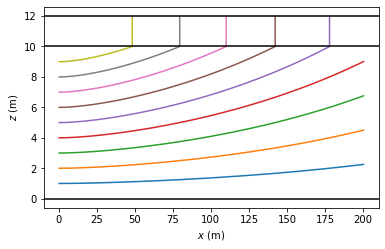

In [15]:
plt.subplot(111, aspect=10)
zstart = np.arange(1.0, 10, 1)
for zs in zstart:
    trace = tt.timtrace(
        ml,
        xstart=rw,
        ystart=0,
        zstart=zs,
        tstartend=[0, 1000],
        tstartoffset=tmin,
        tstep=100,
        nstepmax=100,
        hstepmax=2,
        silent=True,
    )
    xyzt = trace["xyzt"]
    plt.plot(xyzt[:, 0], xyzt[:, 2])
for y in [0, H, H + Hstar]:
    plt.axhline(y, color="k")
plt.xlabel("$x$ (m)")
plt.ylabel("$z$ (m)");

### Example 4. A well in the bottom aquifer of a two-aquifer system

Consider a pumping well in the bottom aquifer of a two-aquifer system; the aquifers are separated by a leaky layer. The well starts pumping with discharge $Q$ at time $t=0$. The well is located at the origin of the coordinate system. 

In [16]:
# parameters
k0 = 20  # hydraulic conductivity aquifer 0, m/d
k1 = 40  # hydraulic conductivity aquifer 1, m/d
H = 10  # thickness of both aquifers, m
Hstar = 2  # thickness of leaky layer, m
c = 100  # resistance of leaky layer, d
Ss = 1e-4  # specific storage of both aquifers, m^(-1)
npor = 0.3  # porosity of both aquifers, -
Q = 100  # discharge of well in aquifer 1, m^3/d
xw = 0  # x-location of well
yw = 0  # y-location of well
rw = 0.3  # radius of well

In [17]:
ml = tt.ModelMaq(
    kaq=[k0, k1],
    z=[H + Hstar + H, H + Hstar, H, 0],
    c=[c],
    Saq=[Ss, Ss],
    poraq=npor,
    porll=npor,
    tmin=0.01,
    tmax=10000,
    M=10,
)
w = tt.Well(ml, xw=0, yw=0, tsandQ=[(0, Q)], layers=1, rw=0.3)
ml.solve()

self.neq  1
solution complete


Five pathlines are started in the top aquifer an five in the bottom aquifer at a distance of 200 m from the well and followed for a maximum of 10,000 days. The pathlines in the bottom aquifer all reach the well within that time, but the pathlines in the top aquifer don't. 

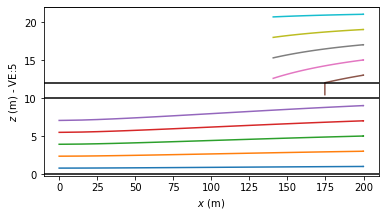

In [18]:
zstart = np.hstack((np.arange(1, 10, 2), np.arange(13, 22, 2)))
plt.subplot(111, aspect=5)
for zs in zstart:
    trace = tt.timtrace(
        ml,
        xstart=200,
        ystart=0,
        zstart=zs,
        tstartend=[0, 10000],
        tstartoffset=0.01,
        tstep=100,
        nstepmax=100,
        hstepmax=10,
        silent=True,
    )
    xyzt = trace["xyzt"]
    plt.plot(xyzt[:, 0], xyzt[:, 2])
for y in [0, H, H + Hstar, H + Hstar + H]:
    plt.axhline(y, color="k")
plt.xlabel("$x$ (m)")
plt.ylabel("$z$ (m) - VE:5");

### Example 5. A partially penetrating well in a four-layer system

Consider a partially penetrating injection well. The aquifer is simulated by 4 layers and the well is screened in the second layer. The well starts pumping with discharge $Q$ at time $t=0$. The well is located at the origin of the coordinate system.

In [19]:
k = 10  # hydraulic conductivity of aquifer, m/d
H = 5  # thickness of each layer, m
Q = 100  # injection rate of well, m^3/d
Ss = 1e-4  # specific storage of both aquifers, m^(-1)
npor = 0.3  # porosity of both aquifers, -
tmin = 0.01  # minimum time, d

In [20]:
ml = tt.Model3D(
    kaq=k, z=np.arange(4, -1, -1) * H, Saq=Ss, poraq=npor, tmin=tmin, tmax=1000
)
w = tt.Well(ml, xw=0, yw=0, tsandQ=[(0, -Q)], layers=1, rw=0.1)
ml.solve()

self.neq  1
solution complete


Start 11 pathlines near the well and trace for 100 days. 

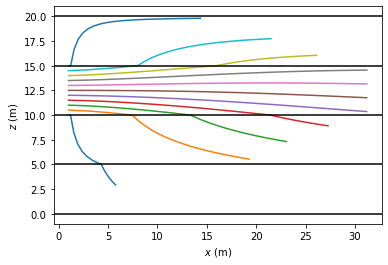

In [21]:
zstart = np.linspace(10.01, 14.99, 11)
for zs in zstart:
    trace = tt.timtrace(
        ml,
        xstart=1,
        ystart=0,
        zstart=zs,
        tstartend=[0, 100],
        tstartoffset=tmin,
        tstep=5,
        nstepmax=200,
        hstepmax=2,
        silent=True,
    )
    xyzt = trace["xyzt"]
    plt.plot(xyzt[:, 0], xyzt[:, 2])
for z in np.arange(4, -1, -1) * H:
    plt.axhline(z, color="k")
plt.axis("scaled")
plt.xlabel("$x$ (m)")
plt.ylabel("$z$ (m)");